In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv("data/airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# 2D-ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ И ЦЕНТРОИДОВ

In [3]:
# инициализация k-means-кластеризации с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)
# обучиение, сохранение в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])
# сохранение предсказания в колонку clusters датафрейма
df["clusters"] = predictions

# с помощью метода cluster_centers_ найходим координаты центроидов кластеров
centroids = kmeans_clustering.cluster_centers_

# для шести кластеров сохраним в отдельные списки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида — в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета — в качестве значения
    colors_dict[i] = colors[i]

Создадим новые столбцы (cen_x, cen_y, color) в датафрейме. В зависимости от значения в ячейке clusters в ячейках cen_x, cen_y и color будут разные значения: если значение в clusters — 0, в cen_x и cen_y будут указаны координаты центроида нулевого кластера и цвет нулевого кластера.

In [4]:
df['cen_x'] = df.clusters.map(centroids_x_dict) 
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2,40.678056,-73.966963,#2095DF
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1,40.735543,-73.988864,#81DF20
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,40.812843,-73.944384,#DF2020
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2,40.678056,-73.966963,#2095DF
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,40.812843,-73.944384,#DF2020


Мы можем просто визуализировать полученные кластеры, передав в переменную информацию о том, какой элемент к какому кластеру принадлежит. В таком случае Seaborn будет автоматически подбирать цвета для кластеров:

c:\Users\mors0\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

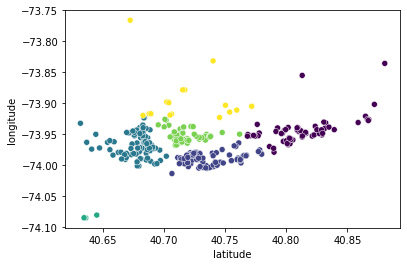

In [5]:
sns.scatterplot(df.latitude, df.longitude, c=df.clusters)

Если мы хотим задать определённые цвета для кластеров, в переменную c передадим столбец с заданными цветами:

c:\Users\mors0\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

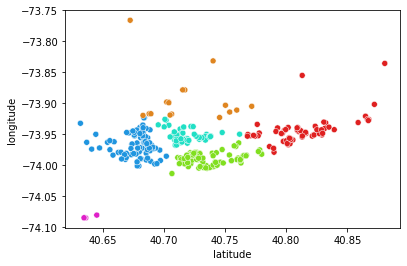

In [6]:
sns.scatterplot(df.latitude, df.longitude, c=df.color)

Если точек слишком много или мало, может понадобиться уменьшить или увеличить их размер. В этом поможет переменная s.

Также могут встретиться перекрывающиеся кластеры — а таком случае нужно, чтобы цвета объектов в кластере были полупрозрачными. В этом поможет переменная alpha: чем ближе её значение к 1, тем менее прозрачны объекты на графике.

c:\Users\mors0\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

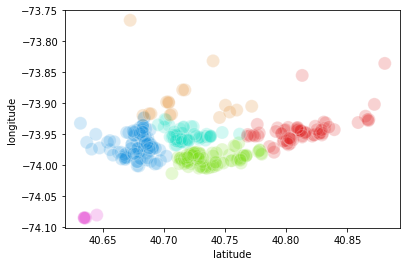

In [7]:
sns.scatterplot(df.latitude, df.longitude, c=df.color, alpha=0.2, s=170)

c:\Users\mors0\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mors0\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

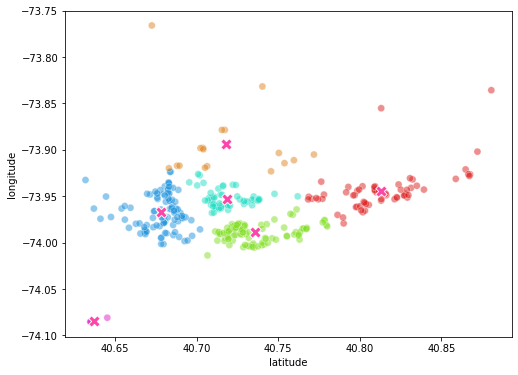

In [8]:
fig, axes = plt.subplots(figsize=(8, 6))
# визуализируем элементы датасета
# параметр c отвечает за цвет элемента в зависимости от того, к какому кластеру он принадлежит
# s отвечает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(df.latitude, df.longitude, c=df.color, s=50, alpha=0.5)
# визуализируем центроиды: отметим их на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(centroids_x, centroids_y, marker="X", c=['#FC46AA'], s=130)

---

# CONVEX HULL

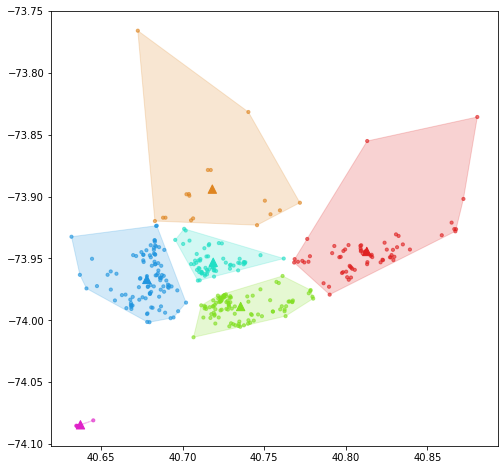

In [9]:
from scipy.spatial import ConvexHull 
import numpy as np

fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha = 0.6, s=10)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

# найдём уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру
    points = df[df.clusters == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

---

# ДЕНДРОГРАММА

In [10]:
# импортируем агломеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

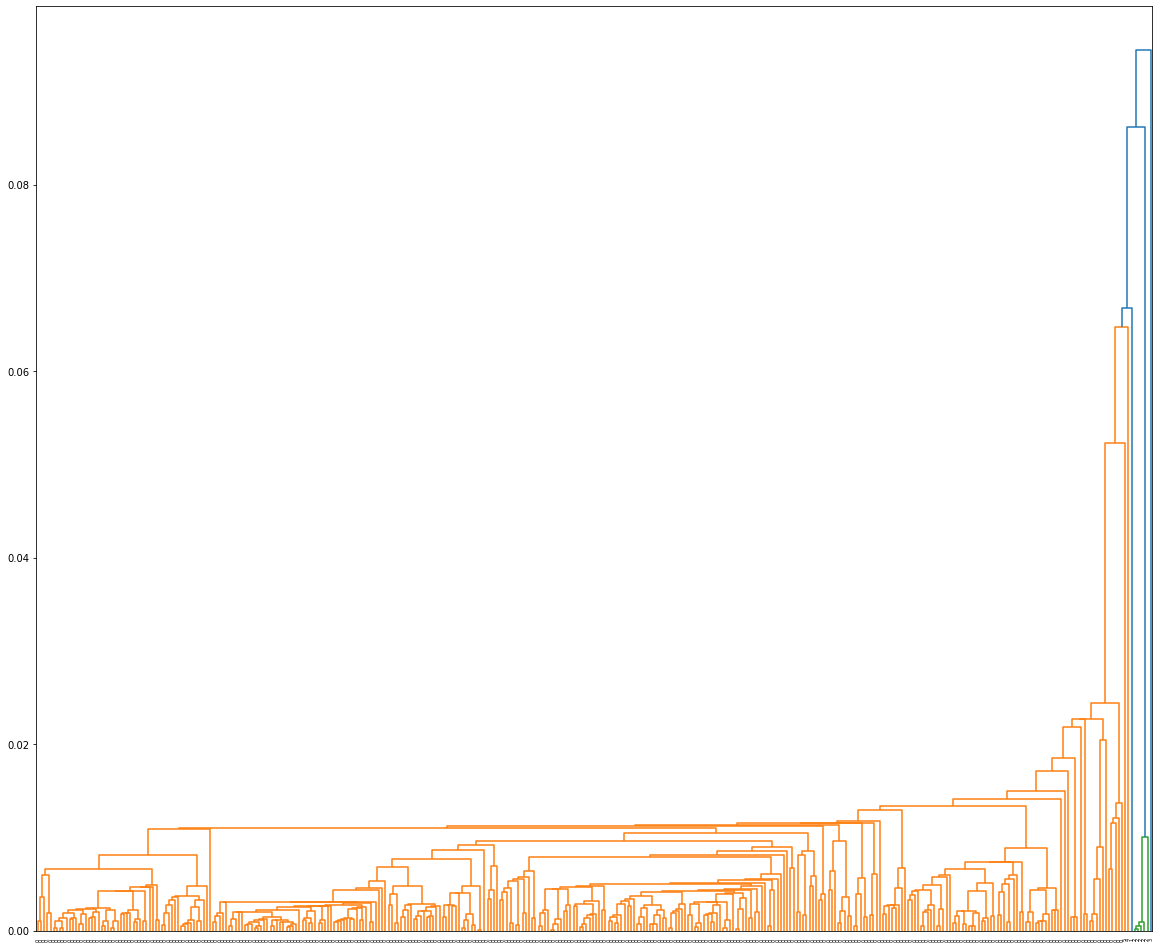

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

---

# CLUSTERGRAM

In [13]:
pip install clustergram

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.5076849460601807 seconds.
K=3 fitted in 0.050966739654541016 seconds.
K=4 fitted in 0.04497385025024414 seconds.
K=5 fitted in 0.05696415901184082 seconds.
K=6 fitted in 0.057962656021118164 seconds.
K=7 fitted in 0.10793495178222656 seconds.
K=8 fitted in 0.0829474925994873 seconds.


<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

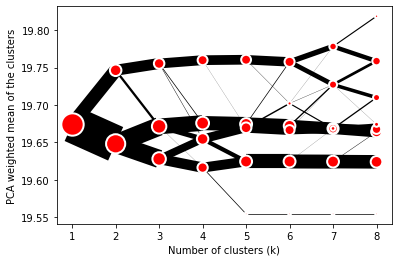

In [14]:
# импортируем библиотеку clustergram
from clustergram import Clustergram

# задаём количество кластеров, для которых хотим получить визуализацию, определяем метод кластеризации
cgram = Clustergram(range(1, 9), method='kmeans')

# запускаем алгоритм
cgram.fit(df[["latitude", "longitude"]])
cgram.plot()

---

# 3D-ВИЗУАЛИЗАЦИЯ

Чтобы визуализировать результаты 3D-кластеризации, её необходимо сначала провести:

In [15]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных широты, долготы и цены, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters_3d"] = kmeans_predictions

## Визуализация с помощью библиотеки Matplotlib:

C:\Users\mors0\AppData\Local\Temp\ipykernel_6100\2384940181.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'price')

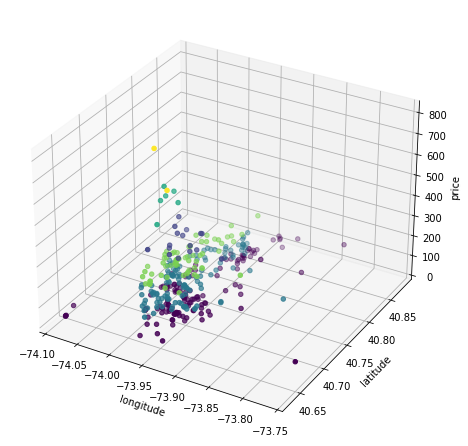

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Изменим угол визуализации: 

C:\Users\mors0\AppData\Local\Temp\ipykernel_6100\1979920711.py:5: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



Text(0.5, 0, 'price')

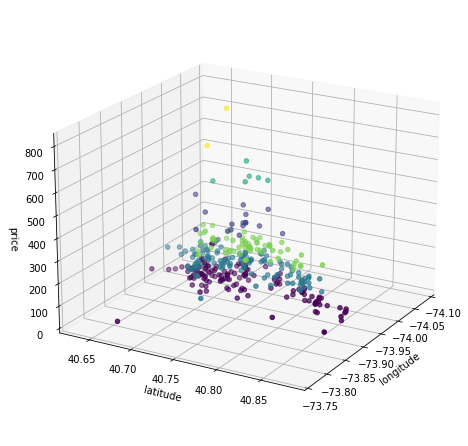

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# создаём трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавляем дополнительную ось в объект картинки
fig.add_axes(ax)

ax.azim = 30
ax.elev = 20

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавляем оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

## Визуализация с помощью библиотеки Plotly:

In [21]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters_3d', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

---

---

## Задание 8.4
Для датасета Airbnb проведите иерархическую алгомеративную кластеризацию с использованием sklearn. В качестве признаков для кластеризации используйте latitude и longitude из датафрейма, количество кластеров для кластеризации — 6. Расстояние между кластерами рассчитайте методом полной связи, направление дендрограммы — top.

Визуализируйте дендрограмму для проведённой кластеризации. На сколько кластеров можно разделить датасет, если расстояние между кластерами будет равно 0.25?

(Ответ: 3)

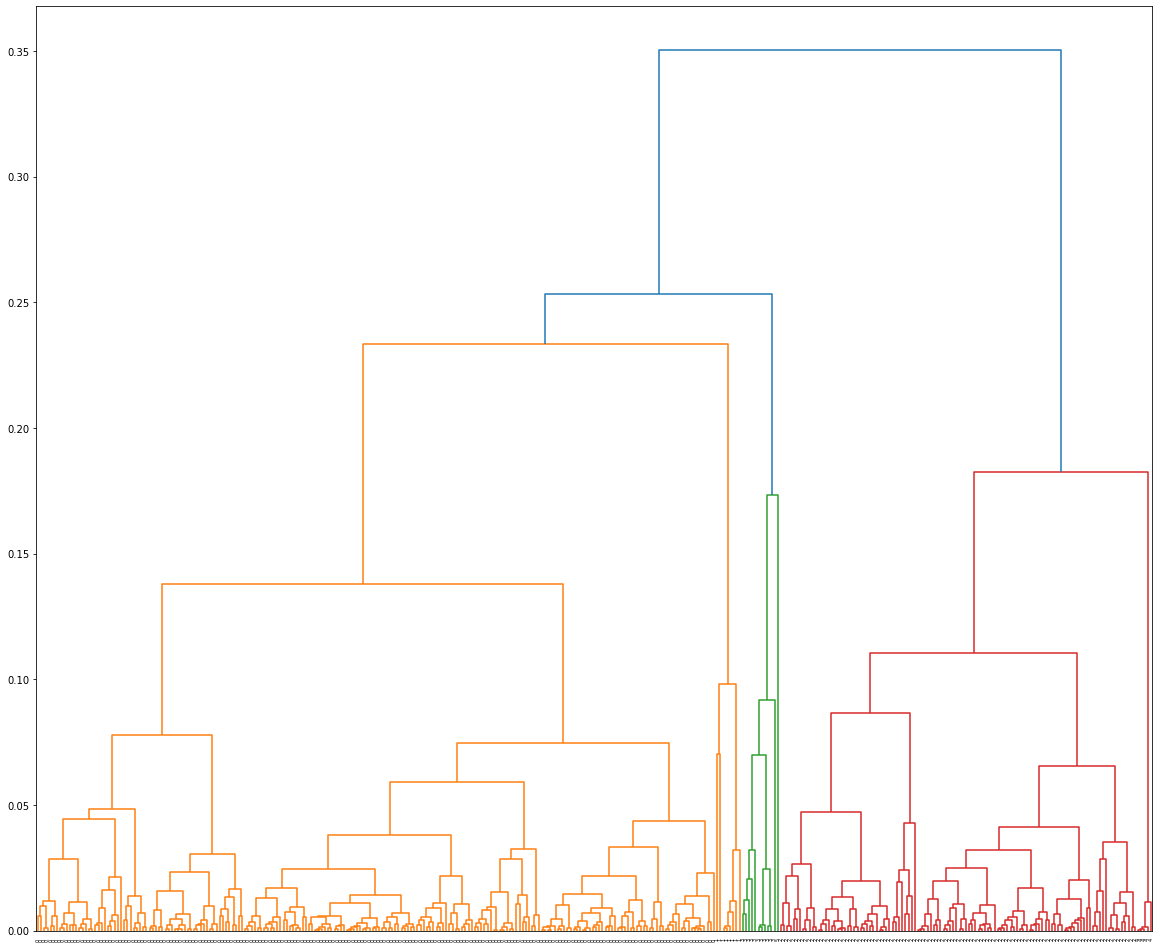

In [22]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete')
pred_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

linked = linkage(df[["latitude", "longitude"]], 'complete')

plt.figure(figsize=(20, 17))

dendrogram(Z=linked,
            orientation='top',
            labels=pred_ag_model,
            distance_sort='descending')

plt.show()

## Задание 8.5
Для датасета Airbnb проведите DBSCAN-кластеризацию. В качестве признаков для кластеризации используйте latitude и longitude. Параметры для алгоритма кластеризации: eps=0.012, min_samples=6.

Визуализируйте результаты. Сколько кластеров получилось на графике?

(Ответ: 4)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

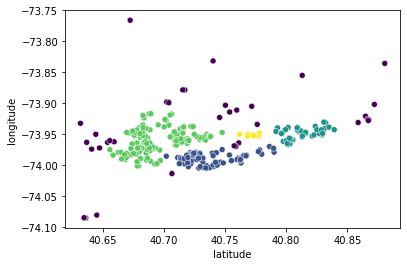

In [23]:
import seaborn as sns
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.012, min_samples=6).fit(df[['latitude', 'longitude']])

sns.scatterplot(x=df.latitude, y=df.longitude, c=clustering.labels_)